Краснощекова Яна

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#тут я задаю все условия, создаю список прибылей в зависимости от того, сколько куплено кг плавников у рыбаков
#функция зависит от кол-ва дней и выводит кол-во кг плавников, при котором прибыль будет максимальной
#также через print я вывожу, до скольки кг плавников можно закупать, чтобы не получать отрицательную прибыль
#у нас такой спрос, что даже если мы будем продавать 1 блюдо - всё равно мы будем в плюсе
#то есть для минимизации рисков нужно закупать меньше 241 кг плавнииков
#а чтобы получать max прибыль, нужно закупать примерно 67 кг плавников у рыбаков

def maxcash(n):
    
    all = []
    
    for z in range(0,260):
        np.random.seed(42)
        value = np.array(np.random.normal(60, 10, size=n))
        price1 = np.full(n,12)
        price2 = np.full(n,6)
        unit_cost = np.full(n,7.5)
        volume = np.full(n,z)

        ost = [0 if i < 0 else i for i in (volume-value)]
        spros = [z if i > z else i for i in value]

        cost_price = volume*unit_cost
        revenue = spros*price1 + ost*price2
        cash = revenue - cost_price
        all.append(np.mean(cash))
        
    for i in range(0,260):
        if all[i]<0:
            print(f'1) Нужно закупать меньше {i} кг плавников, чтобы получать положительную прибыль')
            break
            
    return(f'2) {np.argmax(all)} кг плавников нужно закупить, чтобы получить max прибыль {np.max(all)} доллара')

maxcash(100000)

1) Нужно закупать меньше 241 кг плавников, чтобы получать положительную прибыль


'2) 67 кг плавников нужно закупить, чтобы получить max прибыль 250.93679704826098 доллара'

250.93679704826098 - среднее
259.6589766772023 - медиана
182.6196363887566 - 10% перцентиль
301.5 - 90% перцентиль
[301.5] - мода


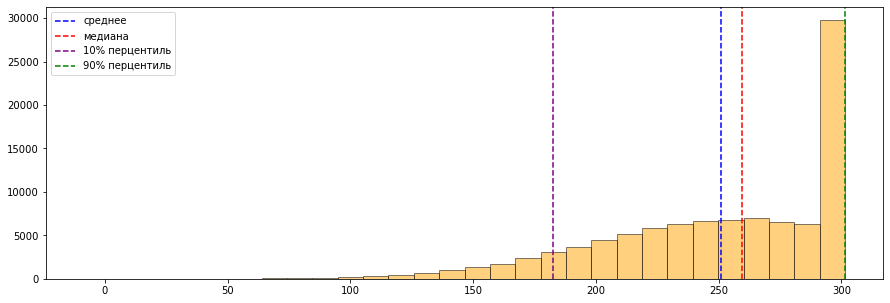

In [3]:
n=100000
z=67
np.random.seed(42)
value = np.array(np.random.normal(60, 10, size=n))
price1 = np.full(n,12)
price2 = np.full(n,6)
unit_cost = np.full(n,7.5)
volume = np.full(n,z)

ost = [0 if i < 0 else i for i in (volume-value)]
spros = [z if i > z else i for i in value]

cost_price = volume*unit_cost
revenue = spros*price1 + ost*price2
cash = revenue - cost_price

print(f'{np.mean(cash)} - среднее')
print(f'{np.median(cash)} - медиана')
print(f'{np.percentile(cash, 10)} - 10% перцентиль')
print(f'{np.percentile(cash, 90)} - 90% перцентиль')
print(f'{stats.mode(cash)[0]} - мода')
fig, ax = plt.subplots(1,1, figsize = (15,5))
plt.hist(cash, bins = 30, color = "orange", alpha = 0.5, edgecolor = "black")
plt.axvline(np.mean(cash), color = "blue", linestyle = "--", label = 'среднее')
plt.axvline(np.median(cash), color = "red", linestyle = "--", label = 'медиана')
plt.axvline(np.percentile(cash, 10), color = "purple", linestyle = "--", label = '10% перцентиль')
plt.axvline(np.percentile(cash, 90), color = "green", linestyle = "--", label = '90% перцентиль')
plt.legend()